# Aprendizado de máquinas
- Vamos usar o dataset iris, bastante conhecido pra quem já trabalha com Machine Learning
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [2]:
# Importando as bibliotecas (pandas, matplotlib, numpy)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importando o dataset iris
from sklearn.datasets import load_iris

In [4]:
# Obtendo os dados do dataset
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# Valores de X
x = data.data

In [6]:
# Valores de Y
y = data.target

**Podemos transformar essa base em um DataFrame para conseguir trabalhar melhor com os dados**

In [7]:
# Transformando em um DataFrame
iris = pd.DataFrame(data.data)
iris.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**O que são as colunas 0, 1, 2, 3? No próprio dataset existe o `feature_names` que podemos usar para atribuir nome as colunas**

In [8]:
# Nome das colunas
iris.columns=data.feature_names
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Também podemos adicionar a coluna `Target` com a classificação de cada linha**

In [9]:
# Adicionando a coluna targer ao DataFrame
iris['Target']=data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Nesse exemplo, para começarmos a trabalhar com Machine Learning, vamos considerar apenas o Target = 0 e Target = 1**

In [10]:
# Contando a quantidade de cada um dos Targets
iris['Target'].value_counts()

0    50
1    50
2    50
Name: Target, dtype: int64

In [11]:
# Retirando Target = 2
iris=iris[iris['Target']!=2]

In [12]:
# Contando novamente os valores
iris['Target'].value_counts()

0    50
1    50
Name: Target, dtype: int64

# Criando uma função para separar esses dados

**Vamos começar visualizando esses dados 2 a 2**
- Podemos usar o `.plotting.scatter_matrix()` do pandas para gerar essa visualização

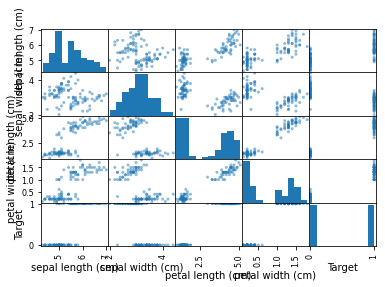

In [13]:
pd.plotting.scatter_matrix(iris);

**Porém também podemos usar o seaborn para tornar o visual mais amigável**
- Do seaborn, podemos usar o `.pairplot()`
    - Usando o parâmetro `hue` podemos escolher qual coluna vai definir a cor dos nossos dados

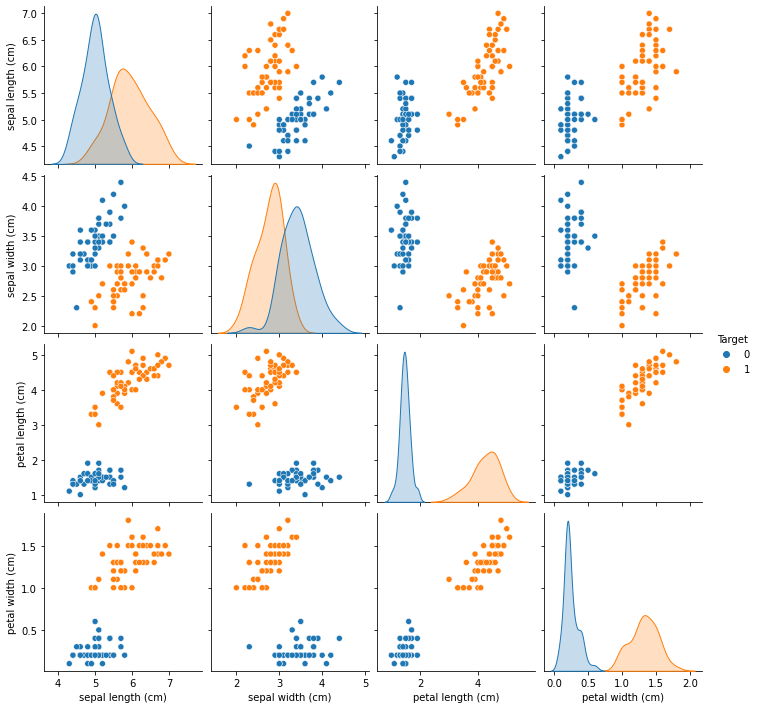

In [14]:
import seaborn as sns
sns.pairplot(iris,hue='Target');

**Conseguimos facilmente traçar uma reta que separaria petal lenght de petal width**<br><br>
**Antes disso, vamos plotar um gráfico com essas informações**

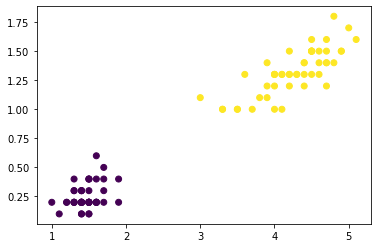

In [15]:
# Traçando um scatter do matplotlib das colunas "petal length (cm)" e "petal width (cm)"
fig, ax = plt.subplots()

ax.scatter(iris['petal length (cm)'],iris['petal width (cm)'], c=iris['Target'])

plt.show()

**Para melhorar a visualização, podemos usar o colormap**
- https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
    - `cmap='PiYG'`

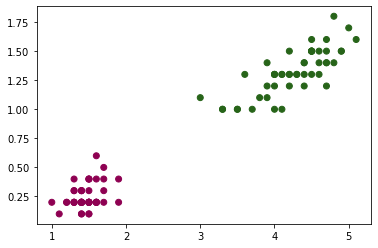

In [16]:
# Traçando um scatter do matplotlib das colunas "petal length (cm)" e "petal width (cm)"
fig, ax = plt.subplots()

x=iris['petal length (cm)']
y=iris['petal width (cm)']

ax.scatter(x,y, c=iris['Target'],cmap='PiYG')

plt.show()

# Podemos traçar uma reta capaz de separar esses dados

**Vamos traçar qualquer reta que irá conseguir separar os 2 dados**

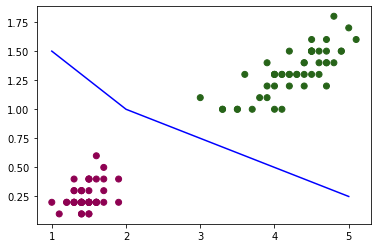

In [17]:
# Traçando o scatter plot e a reta
fig, ax = plt.subplots()

# criando gráfico de dispersão
x=iris['petal length (cm)']
y=iris['petal width (cm)']
ax.scatter(x,y, c=iris['Target'],cmap='PiYG')

# criando gráfico de linha
x_reta=[1,2,5]
y_reta=[1.5,1,0.25]
ax.plot(x_reta,y_reta,color='blue')

plt.show()

## <font color="blue">Essa é a melhor reta que separa esses dados?</font>
- <font color="red"> **Provavelmente não, mas ela consegue resolver o nosso problema** </font>

**Porém podemos traçar outras retas que também conseguem fazer isso**

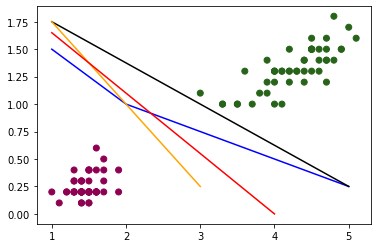

In [18]:
# Buscando por melhores retas
fig, ax = plt.subplots()

# criando gráfico de dispersão
x=iris['petal length (cm)']
y=iris['petal width (cm)']
ax.scatter(x,y, c=iris['Target'],cmap='PiYG')

# criando gráfico de linha
x_reta=[1,2,5]
y_reta=[1.5,1,0.25]
ax.plot(x_reta,y_reta,color='blue')

# criando gráfico de linha
x_reta2=[1,5]
y_reta2=[1.75,0.25]
ax.plot(x_reta2,y_reta2,color='black')

# criando gráfico de linha
x_reta2=[1,3]
y_reta2=[1.75,0.25]
ax.plot(x_reta2,y_reta2,color='orange')

# criando gráfico de linha
x_reta3=[1,4]
y_reta3=[1.65,0]
ax.plot(x_reta3,y_reta3,color='red')

plt.show()

**Qualquer uma das retas serviria para o nosso modelo já que elas separam os dados (lembre-se que na maioria dos casos não vamos estar falando de apenas 2 dimensões)**
<br><br>
**Podemos escolher a <font color="red"> vermelha </font> pelo fato dela não estar nem muito próxima ao 0 nem muito próxima ao 1**

**Essa reta é dada pela equação abaixo:**<br>
**<font color="red"> y = -x + 3** </font>

**Para determinar em qual região qualquer ponto vai estar, basta substituirmos o x do ponto na equação acima e verificar:**<br><br>
- Se y do ponto > y da equação, esse ponto vai ser classificado como 1
- Se y do ponto < y da equação, esse ponto vai ser classificado como 0

**Ex: (3.5,0.7)**
- y da equação = -x + 3 = -3.5 + 3 = -0.5
- y do ponto = 0.7
<br><br>
- Nesse caso: **`y do ponto > y da equação`** -> **Target = 1**

**Para visualizar, podemos traçar esse ponto no gráfico acima**

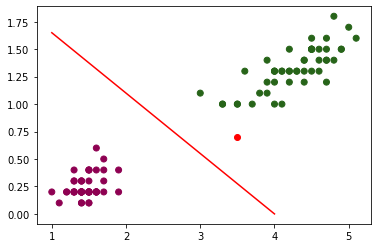

In [19]:
# Traçando novamente a reta e adicionando o ponto que acima
# Buscando por melhores retas
fig, ax = plt.subplots()

# criando gráfico de dispersão
x=iris['petal length (cm)']
y=iris['petal width (cm)']
ax.scatter(x,y, c=iris['Target'],cmap='PiYG')

# criando gráfico de linha
x_reta3=[1,4]
y_reta3=[1.65,0]
ax.plot(x_reta3,y_reta3,color='red')

# criando gráfico scatter do exemplo acima
ax.scatter(3.5,0.7,c='red')

plt.show()

In [20]:
# Criando uma função para classificador pontos 
def classifica_modelo(x,y):
    y_equacao = -x+3
    y_ponto = y
    if y_ponto>y_equacao:
        return 1
    elif y_ponto<y_equacao:
        return 0
    else:
        return -1

In [21]:
# Testando função
classifica_modelo(1,1)

0

# Criando um modelo de Machine Learning para classificar meus pontos

### Vamos usar o Perceptron para descobrir a melhor reta que separa esses pontos
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

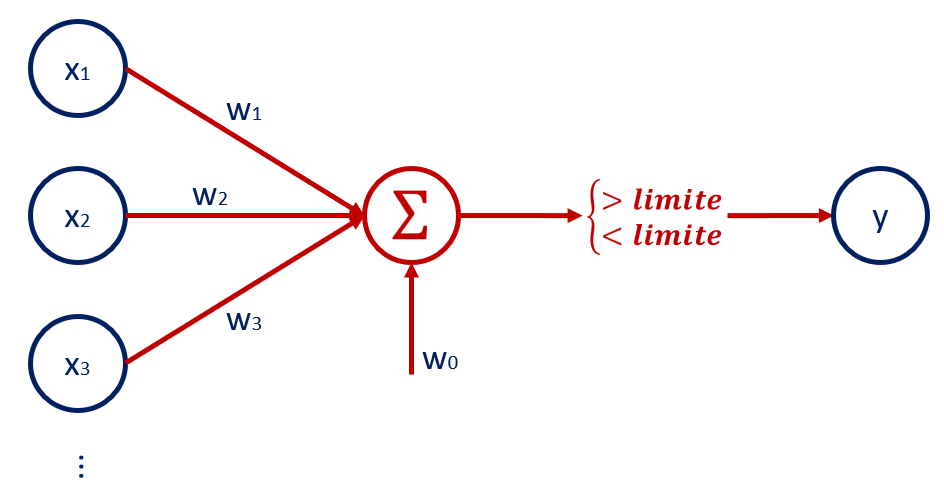

In [22]:
# Importando o perceptron e fazendo o fit
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)

#### Usando para os nossos dados

In [23]:
# Selecionando o X e o y
X=iris[['petal length (cm)','petal width (cm)']]
y=iris['Target']

In [24]:
# Fazendo o fit com o modelo
clf.fit(X, y)

Perceptron()

In [25]:
# w1 e w2
clf.coef_

array([[0.9, 1.7]])

In [26]:
# w0
clf.intercept_

array([-3.])

In [27]:
# Colocando tanto o perceptron quanto a reta que traçamos no gráfico

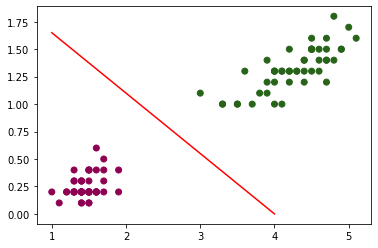

In [28]:
# Traçando novamente a reta e adicionando o ponto que acima
# Buscando por melhores retas
fig, ax = plt.subplots()

# criando gráfico de dispersão
x=iris['petal length (cm)']
y=iris['petal width (cm)']
ax.scatter(x,y, c=iris['Target'],cmap='PiYG')

# criando gráfico de linha
x_reta3=[1,4]
y_reta3=[1.65,0]
ax.plot(x_reta3,y_reta3,color='red')

plt.show()

**Adicionando uma nova base com os dados mostrados abaixo**
- Esses dados foram criados por nós e servem apenas para mostrar o que aconteceria no caso da adição de novos dados ao modelo

In [29]:
# Adicionando uma nova base com os dados mostrados abaixo
base2 = pd.DataFrame([[0,0,3,0.75,0], [0,0,2.5,1,0]])
base2.columns = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','Target']

In [30]:
base2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,0,0,3.0,0.75,0
1,0,0,2.5,1.00,0


In [31]:
# Adicionado esses dados ao dataset iris
iris = iris.append(base2)

C:\Users\rault\AppData\Local\Temp\ipykernel_4456\839951633.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris = iris.append(base2)


In [32]:
# Executando o Perceptron pra essa nova base
X = iris[["petal length (cm)","petal width (cm)"]]
y = iris.Target

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

Perceptron()

**Traçando novamente o gráfico com o perceptron e a nossa reta para os novos dados**

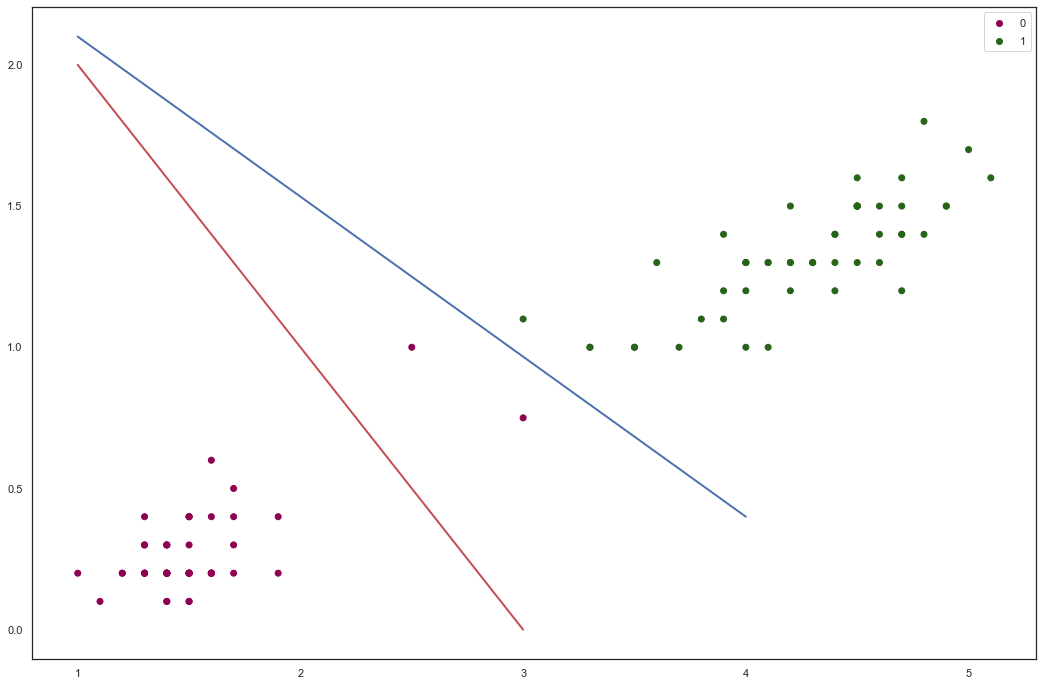

In [213]:
fig, ax = plt.subplots()

scatter_plot = ax.scatter(iris["petal length (cm)"],iris["petal width (cm)"],c=iris.Target, cmap='PiYG')

ax.legend(handles=scatter_plot.legend_elements()[0], labels=scatter_plot.legend_elements()[1])

# Traçando novamente a reta gerada pelo perceptron
x_perc = np.arange(1,5)
y_perc = -((clf.intercept_[0])/(clf.coef_[0][1]))-((clf.coef_[0][0])/(clf.coef_[0][1]))*x_perc
ax.plot(x_perc,y_perc,c="b",linewidth=2.0)

# E a reta do nosso modelo
x2 = [1,3]
y2 = [2,0]
ax.plot(x2,y2,c="r",linewidth=2.0)

plt.show()

**Observe que agora para os novos dados o perceptron consegue se ajustar e traçar uma nova reta, continuando classificando todos os pontos de forma correta. 
Já na nossa reta traçada inicialmente, esses dois novos pontos seriam classificados de forma errada.**